In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel(r"data\data diabetes.xlsx")

In [ ]:
data.head(10)

,Jumlah kehamilan,Kadar gula darah,Tekanan darah,Ketebalan kulit,Insulin,Indeks massa tubuh,Riwayat genetik diabetes,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2288.000,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Jumlah kehamilan          768 non-null    int64  
 1   Kadar gula darah          768 non-null    int64  
 2   Tekanan darah             768 non-null    int64  
 3   Ketebalan kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   Indeks massa tubuh        768 non-null    float64
 6   Riwayat genetik diabetes  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:

print(data.nunique())

Jumlah kehamilan             17
Kadar gula darah            136
Tekanan darah                47
Ketebalan kulit              51
Insulin                     186
Indeks massa tubuh          248
Riwayat genetik diabetes    517
Age                          52
Outcome                       2
dtype: int64


In [ ]:
print(data.describe())

       Jumlah kehamilan  Kadar gula darah  Tekanan darah  Ketebalan kulit  \
count        768.000000        768.000000     768.000000       768.000000   
mean           3.845052        120.894531      69.105469        20.536458   
std            3.369578         31.972618      19.355807        15.952218   
min            0.000000          0.000000       0.000000         0.000000   
25%            1.000000         99.000000      62.000000         0.000000   
50%            3.000000        117.000000      72.000000        23.000000   
75%            6.000000        140.250000      80.000000        32.000000   
max           17.000000        199.000000     122.000000        99.000000   

          Insulin  Indeks massa tubuh  Riwayat genetik diabetes         Age  \
count  768.000000          768.000000                768.000000  768.000000   
mean    79.799479           31.992578                 81.627618   33.240885   
std    115.244002            7.884160                327.912860   11.

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
hasil_iqr = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    hasil_iqr[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

for col, info in hasil_iqr.items():
    print(f"\n=== {col} ===")
    for k, v in info.items():
        print(f"{k}: {v}")



=== Jumlah kehamilan ===
Q1: 1.0
Q3: 6.0
IQR: 5.0
Lower Bound: -6.5
Upper Bound: 13.5

=== Kadar gula darah ===
Q1: 99.0
Q3: 140.25
IQR: 41.25
Lower Bound: 37.125
Upper Bound: 202.125

=== Tekanan darah ===
Q1: 62.0
Q3: 80.0
IQR: 18.0
Lower Bound: 35.0
Upper Bound: 107.0

=== Ketebalan kulit ===
Q1: 0.0
Q3: 32.0
IQR: 32.0
Lower Bound: -48.0
Upper Bound: 80.0

=== Insulin ===
Q1: 0.0
Q3: 127.25
IQR: 127.25
Lower Bound: -190.875
Upper Bound: 318.125

=== Indeks massa tubuh ===
Q1: 27.3
Q3: 36.6
IQR: 9.3
Lower Bound: 13.35
Upper Bound: 50.550000000000004

=== Riwayat genetik diabetes ===
Q1: 0.24375
Q3: 0.62625
IQR: 0.38249999999999995
Lower Bound: -0.32999999999999996
Upper Bound: 1.2

=== Age ===
Q1: 24.0
Q3: 41.0
IQR: 17.0
Lower Bound: -1.5
Upper Bound: 66.5

=== Outcome ===
Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

outlier_counts = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_counts[col] = len(outliers)


for col, count in outlier_counts.items():
    print(f"Kolom {col}: {count} outlier")


Kolom Jumlah kehamilan: 4 outlier
Kolom Kadar gula darah: 5 outlier
Kolom Tekanan darah: 45 outlier
Kolom Ketebalan kulit: 1 outlier
Kolom Insulin: 34 outlier
Kolom Indeks massa tubuh: 19 outlier
Kolom Riwayat genetik diabetes: 51 outlier
Kolom Age: 9 outlier
Kolom Outcome: 0 outlier


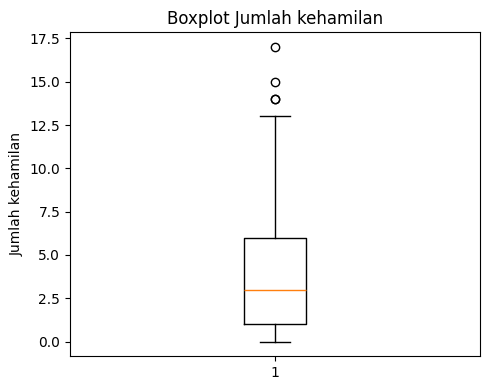

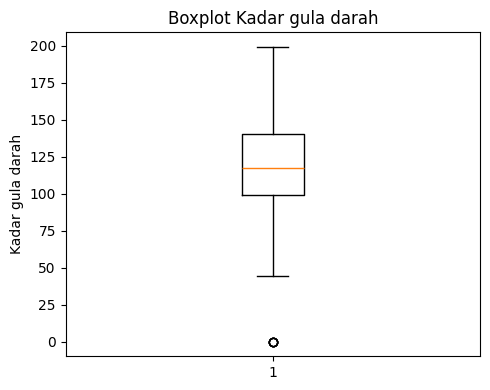

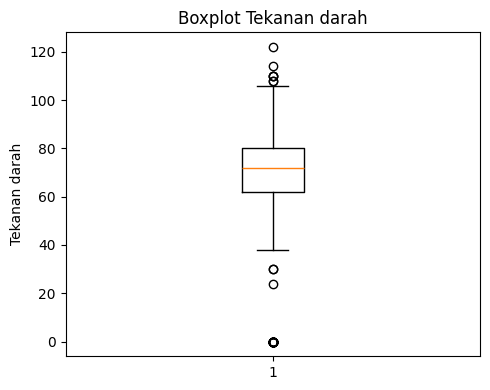

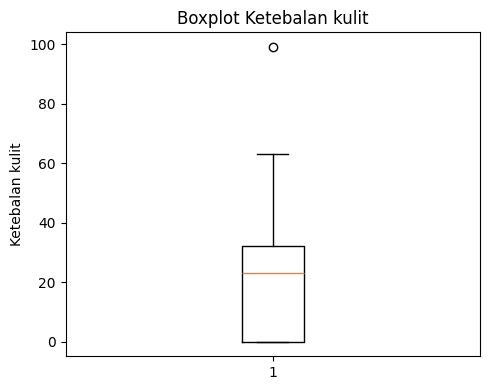

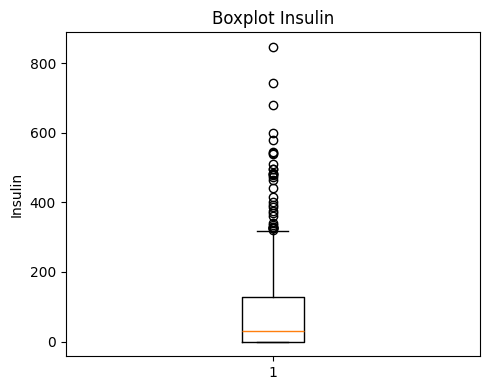

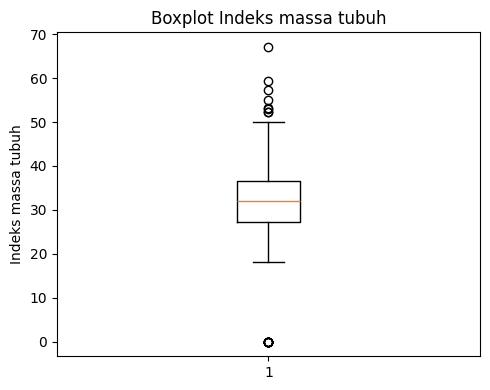

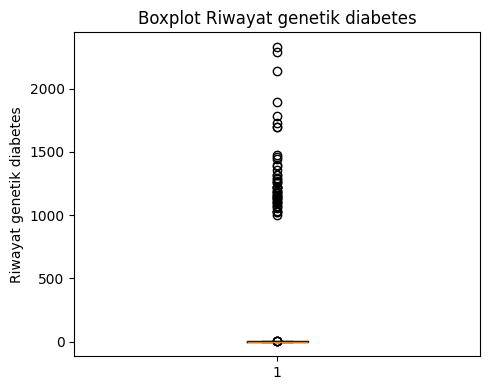

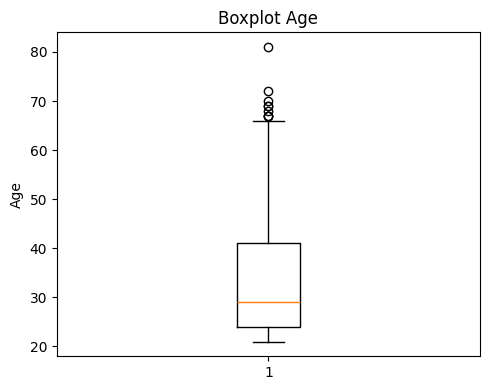

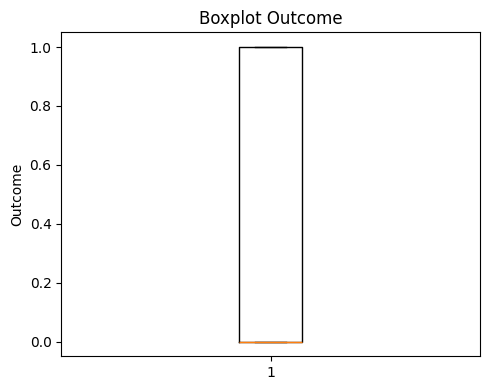

In [ ]:

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    plt.boxplot(data[col].dropna())
    plt.title(f"Boxplot {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [ ]:

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = data[col].clip(lower_bound, upper_bound)

print("Outlier berhasil ditangani menggunakan IQR Capping!")

Outlier berhasil ditangani menggunakan IQR Capping!


In [ ]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = len(data[(data[col] < lower) | (data[col] > upper)])
    print(f"Kolom {col}: {count} outlier tersisa")


Kolom Jumlah kehamilan: 0 outlier tersisa
Kolom Kadar gula darah: 0 outlier tersisa
Kolom Tekanan darah: 0 outlier tersisa
Kolom Ketebalan kulit: 0 outlier tersisa
Kolom Insulin: 0 outlier tersisa
Kolom Indeks massa tubuh: 0 outlier tersisa
Kolom Riwayat genetik diabetes: 0 outlier tersisa
Kolom Age: 0 outlier tersisa
Kolom Outcome: 0 outlier tersisa


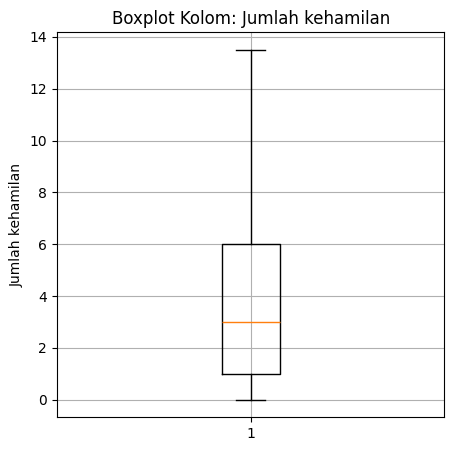

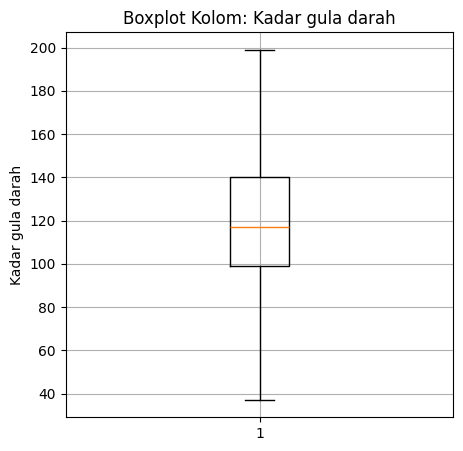

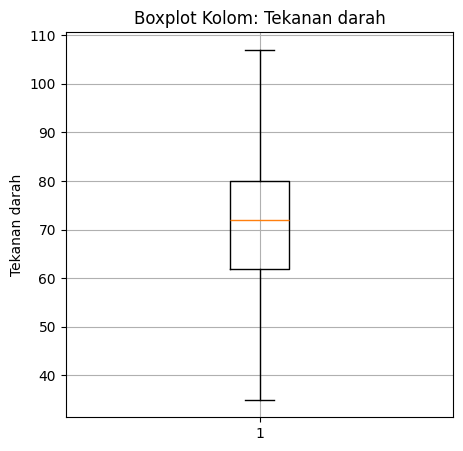

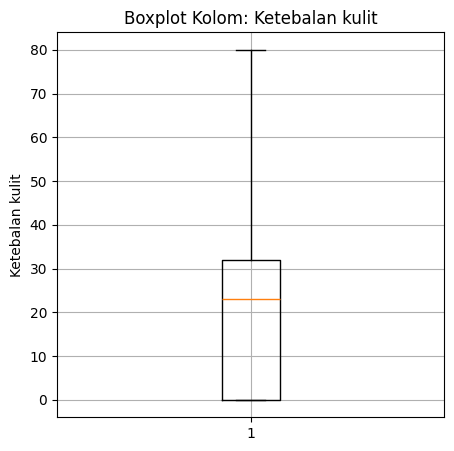

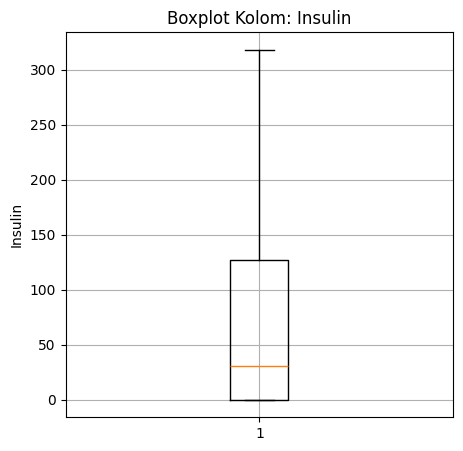

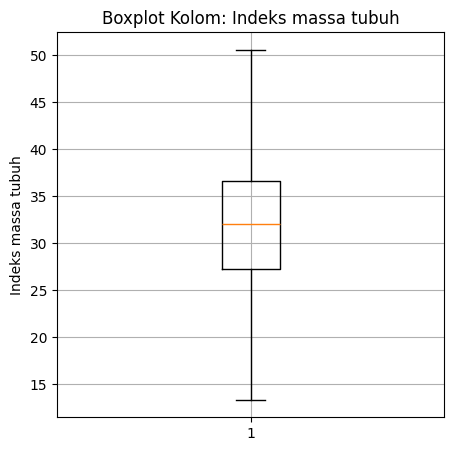

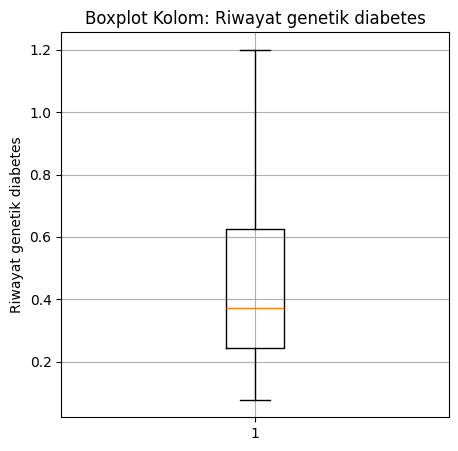

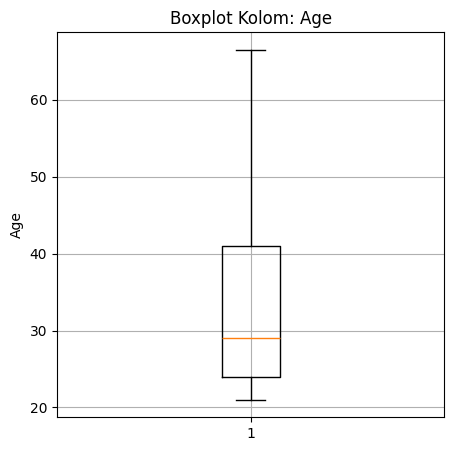

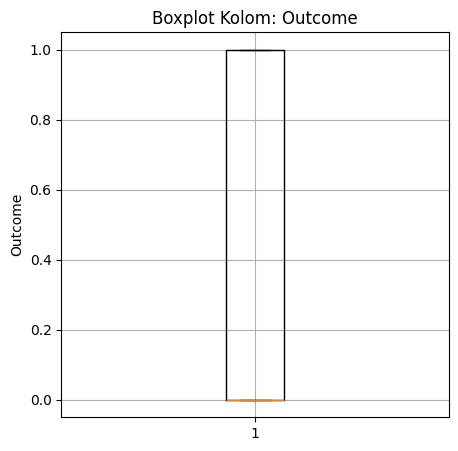

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(5, 5))
    plt.boxplot(data[col])
    plt.title(f"Boxplot Kolom: {col}")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


In [ ]:
data.duplicated().sum()


np.int64(0)

In [ ]:

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)


Ukuran X_train: (614, 8)
Ukuran X_test : (154, 8)
Ukuran y_train: (614,)
Ukuran y_test : (154,)


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)


svm_model.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred = svm_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model SVM:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi Model SVM: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
[[83 17]
 [21 33]]


<Figure size 600x500 with 0 Axes>

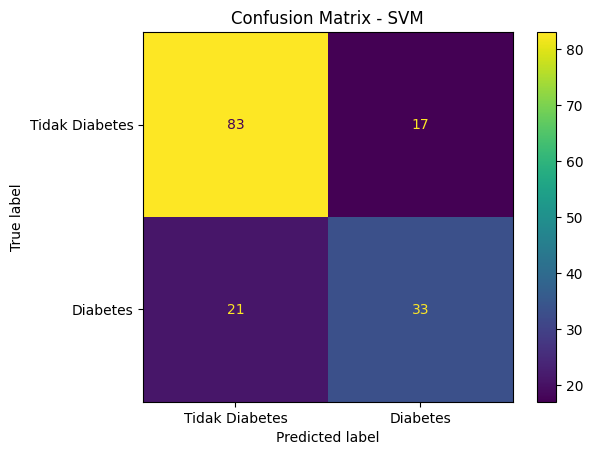

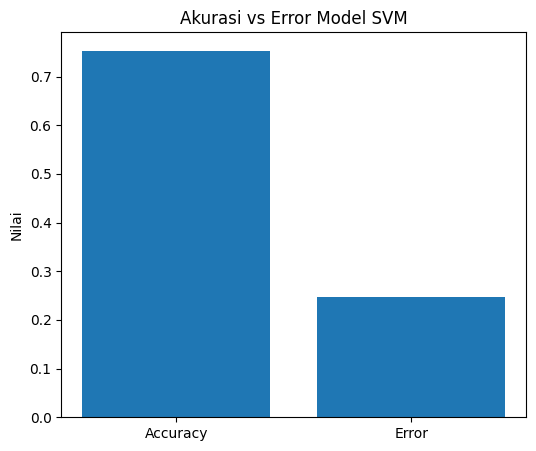

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Diabetes', 'Diabetes'])
disp.plot(values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()


error = 1 - accuracy

plt.figure(figsize=(6,5))
plt.bar(['Accuracy', 'Error'], [accuracy, error])
plt.title("Akurasi vs Error Model SVM")
plt.ylabel("Nilai")
plt.show()


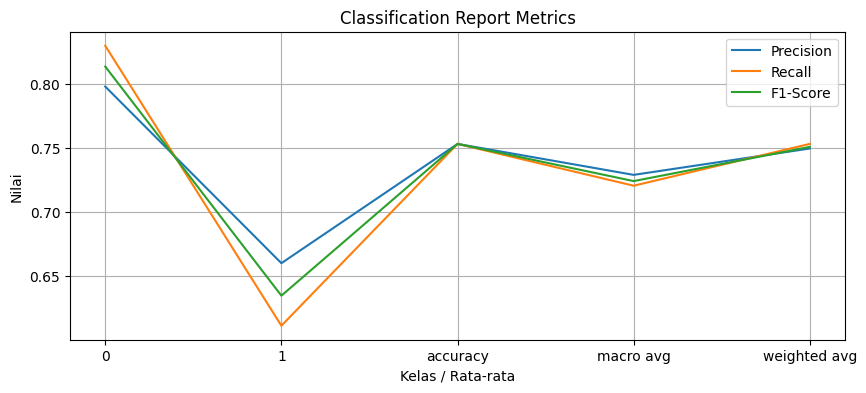

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

import pandas as pd
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,4))
plt.plot(df_report['precision'], label='Precision')
plt.plot(df_report['recall'], label='Recall')
plt.plot(df_report['f1-score'], label='F1-Score')
plt.title("Classification Report Metrics")
plt.xlabel("Kelas / Rata-rata")
plt.ylabel("Nilai")
plt.legend()
plt.grid(True)
plt.show()